In [1]:
import numpy as np
import pylab as plt
import pandas as pd

import bigjson
import gc

from mpc_preprocessing import read_mpcorb
from mpc_preprocessing import read_MPCephem

In [2]:
mpc_fname = '/home/ellie/Downloads/mpcorb_extended.json'

num_rows = 10000

for k in range(12, 51):
    out_fname = '/home/ellie/research/lsst/mpcorb_extended_pt{}.csv'.format(k)
    mpcorb_df = read_mpcorb(mpc_fname, numrows=num_rows, start_idx=k*num_rows)
    nums = mpcorb_df['Number'].tolist()
    ephemerides_df = read_MPCephem(nums)
    df = pd.merge(mpcorb_df, ephemerides_df, on='Number')
    df.to_csv(out_fname)

    print(df.head)    

    del df
    del mpcorb_df
    del ephemerides_df
    gc.collect()

<bound method NDFrame.head of         Number Principle_desig      Epoch         a         e         i  \
0     (120001)       2002 YL15  2460800.5  2.313175  0.114127   4.31570   
1     (120002)       2002 YD20  2460800.5  2.362312  0.069475   3.18853   
2     (120003)       2002 YU23  2460800.5  2.415309  0.160411   3.92879   
3     (120004)       2002 YB24  2460800.5  2.304342  0.181990   1.08949   
4     (120005)       2002 YB31  2460800.5  2.375968  0.158485   1.72230   
...        ...             ...        ...       ...       ...       ...   
9995  (129996)       1999 VF25  2460800.5  2.571039  0.156648  10.64117   
9996  (129997)       1999 VH28  2460800.5  2.545243  0.143312   2.89413   
9997  (129998)       1999 VA31  2460800.5  2.595861  0.153200  10.83313   
9998  (129999)       1999 VM33  2460800.5  2.442849  0.205455   1.41961   
9999  (130000)       1999 VX33  2460800.5  2.802186  0.127485  10.10801   

           Node       Peri          M         n    Last_obs Orbit_typ

In [7]:
dfs = []

for f in range(51):
    df_f = pd.read_csv('/home/ellie/research/lsst/mpcorb_extended_pt{}.csv'.format(f))
    dfs.append(df_f)

df_final = pd.concat(dfs, ignore_index=True)

In [8]:
df_final.to_csv('/home/ellie/research/lsst/mpcorb_extended_complete.csv')

In [1]:
## check that keplerian velocities work

ceres_data = pd.read_csv('/home/ellie/research/lsst/mpcorb_ceres_ready.csv')
df_poli = pd.read_csv('/home/ellie/research/lsst/mpcorb_ceres_vel_poli.csv')

plt.scatter(ceres_data['heliocentricDist'], ceres_data['x_dotk'], label='kepler', s=5)
plt.scatter(ceres_data['heliocentricDist'], ceres_data["X'"], label='measured', s=5)
plt.scatter(df_poli['heliocentricDist'], df_poli["x_dotk"], label='poli', s=5)
plt.legend()

NameError: name 'pd' is not defined

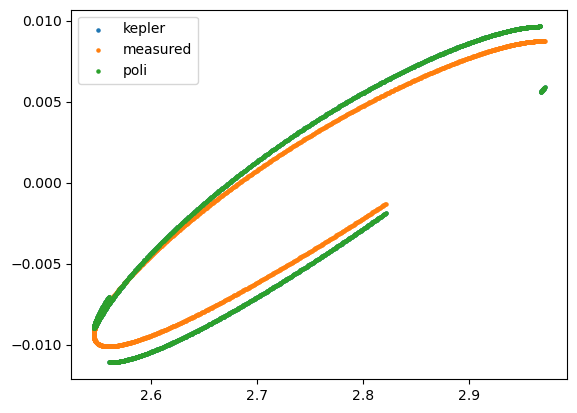

In [38]:
plt.scatter(ceres_data['heliocentricDist'], ceres_data['y_dotk'], label='kepler', s=5)
plt.scatter(ceres_data['heliocentricDist'], ceres_data["Y'"], label='measured', s=5)
plt.scatter(df_poli['heliocentricDist'], df_poli["y_dotk"], label='poli', s=5)
plt.legend()

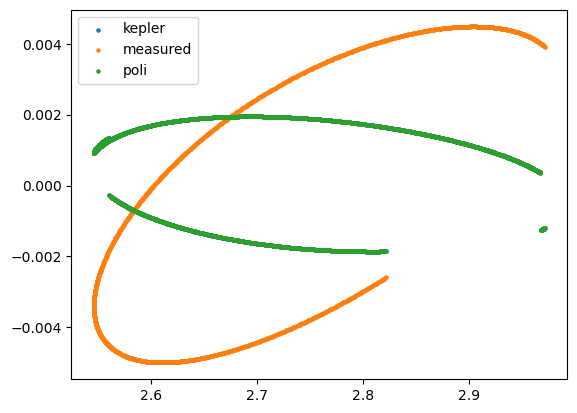

In [40]:
plt.scatter(ceres_data['heliocentricDist'], ceres_data['z_dotk'], label='kepler', s=5)
plt.scatter(ceres_data['heliocentricDist'], ceres_data["Z'"], label='measured', s=5)
plt.scatter(df_poli['heliocentricDist'], df_poli["z_dotk"], label='poli', s=5)
plt.legend()

In [4]:
df = pd.read_csv('/home/ellie/research/lsst/mpcorb_extended_complete_vel_2sept.csv')

/tmp/ipykernel_7779/3584522451.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/ellie/research/lsst/mpcorb_extended_complete_vel_2sept.csv')


In [5]:
atiras = df.loc[df['Orbit_type'] == 'Atira']
print("Number of Atiras: {}".format(len(atiras)))

atens = df.loc[df['Orbit_type'] == 'Aten']
print("Number of Atens: {}".format(len(atens)))

apollos = df.loc[df['Orbit_type'] == 'Apollo']
print("Number of Apollos: {}".format(len(apollos)))

amors = df.loc[df['Orbit_type'] == 'Amor']
print("Number of Amors: {}".format(len(amors)))

obj_under = df.loc[df['Orbit_type'] == 'Object with perihelion distance < 1.665 AU']
print("Number of Objects with perihelion distance < 1.665 AU: {}".format(len(obj_under)))

hungaria = df.loc[df['Orbit_type'] == 'Hungaria']
print("Number of Hungaria: {}".format(len(hungaria)))

main_belts = df.loc[df['Orbit_type'] == 'MBA']
print("Number of MBAs: {}".format(len(main_belts)))

phocaeas = df.loc[df['Orbit_type'] == 'Phocaea']
print("Number of Phocaeas: {}".format(len(phocaeas)))

hildas = df.loc[df['Orbit_type'] == 'Hilda']
print("Number of Hildas: {}".format(len(hildas)))

jtroj = df.loc[df['Orbit_type'] == 'Jupiter Trojan']
print("Number of Jupiter Trojans: {}".format(len(jtroj)))

distant = df.loc[df['Orbit_type'] == 'Distant Object']
print("Number of Distant Objects: {}".format(len(distant)))

unclass = df.loc[df['Orbit_type'] == 'Unclassified']
print("Number of Unclassifieds: {}".format(len(unclass)))

sum_classes = len(atiras)+len(atens)+len(apollos)+len(amors)+len(hungaria)+\
len(main_belts)+len(phocaeas)+len(hildas)+len(jtroj)+len(distant)+len(obj_under)
total = len(df)

print("Sum of classes: {}".format(sum_classes))
print("Total: {}".format(total))

Number of Atiras: 9
Number of Atens: 208
Number of Apollos: 1232
Number of Amors: 1100
Number of Objects with perihelion distance < 1.665 AU: 4206
Number of Hungaria: 8269
Number of MBAs: 472906
Number of Phocaeas: 4898
Number of Hildas: 2119
Number of Jupiter Trojans: 4597
Number of Distant Objects: 466
Number of Unclassifieds: 0
Sum of classes: 500010
Total: 500010


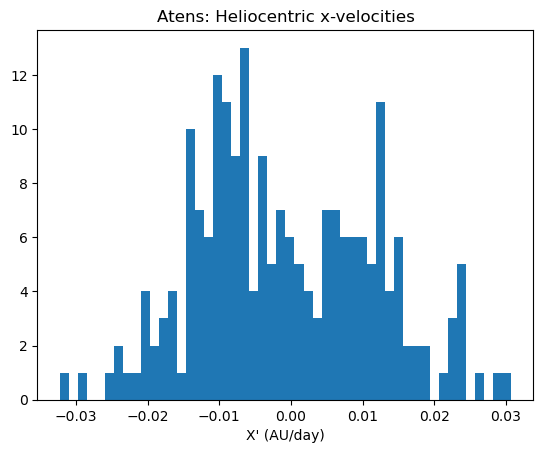

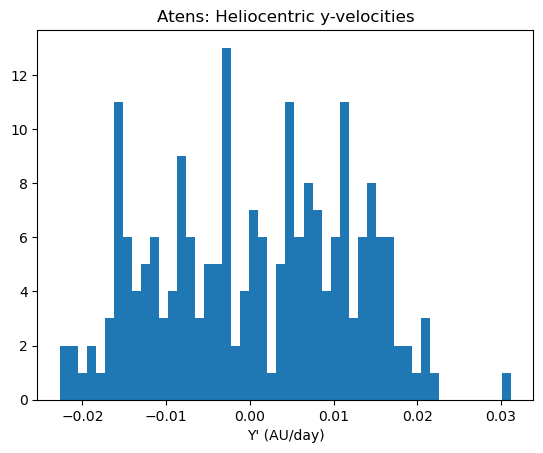

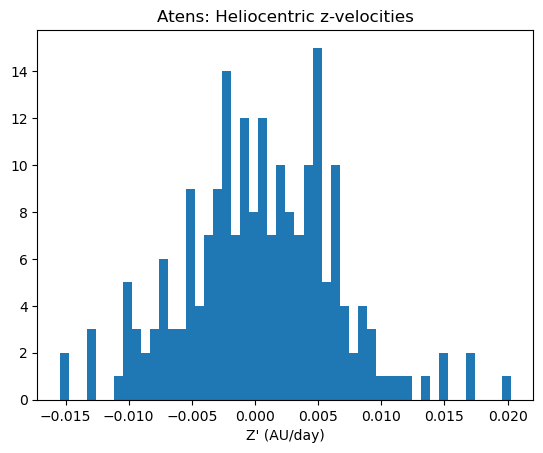

In [9]:
plt.hist(atens["X'"], bins=50)
#plt.hist(main_belts['x_dotk'], bins=100)
plt.title("Atens: Heliocentric x-velocities")
plt.xlabel("X' (AU/day)")
plt.show()

plt.hist(atens["Y'"], bins=50)
#plt.hist(-main_belts['y_dotk'], bins=100)
plt.title("Atens: Heliocentric y-velocities")
plt.xlabel("Y' (AU/day)")
plt.show()

plt.hist(atens["Z'"], bins=50)
#plt.hist(main_belts['z_dotk'], bins=100)
plt.title("Atens: Heliocentric z-velocities")
plt.xlabel("Z' (AU/day)")
plt.show()

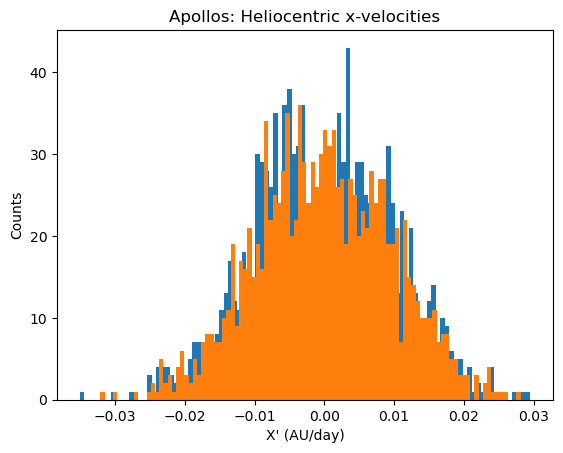

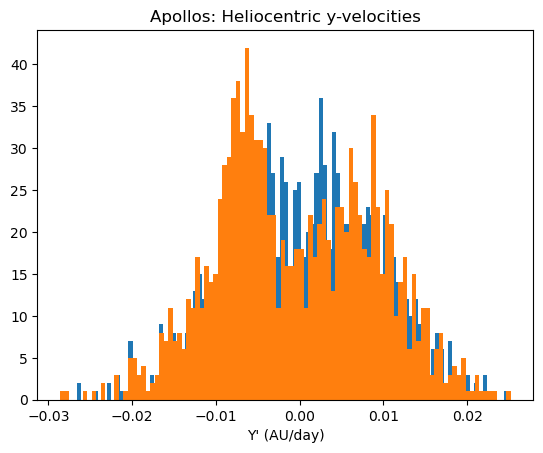

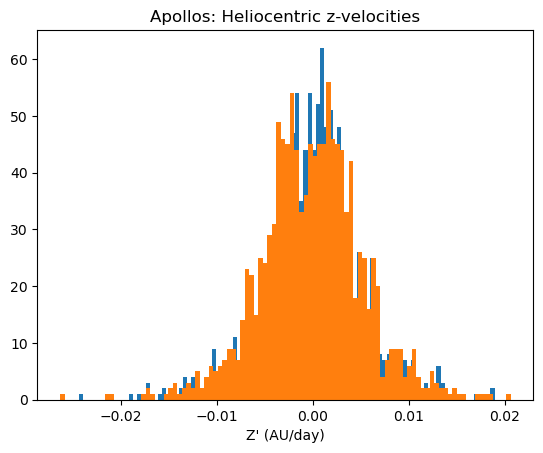

In [6]:
plt.hist(apollos["X'"], bins=100)
plt.hist(apollos['x_dotk'], bins=100)
#plt.hist(main_belts['x_dotk'], bins=100)
plt.title("Apollos: Heliocentric x-velocities")
plt.xlabel("X' (AU/day)")
plt.ylabel("Counts")
plt.show()

plt.hist(apollos["Y'"], bins=100)
plt.hist(apollos['y_dotk'], bins=100)
#plt.hist(-main_belts['y_dotk'], bins=100)
plt.title("Apollos: Heliocentric y-velocities")
plt.xlabel("Y' (AU/day)")
plt.show()

plt.hist(apollos["Z'"], bins=100)
plt.hist(apollos['z_dotk'], bins=100)
#plt.hist(main_belts['z_dotk'], bins=100)
plt.title("Apollos: Heliocentric z-velocities")
plt.xlabel("Z' (AU/day)")
plt.show()

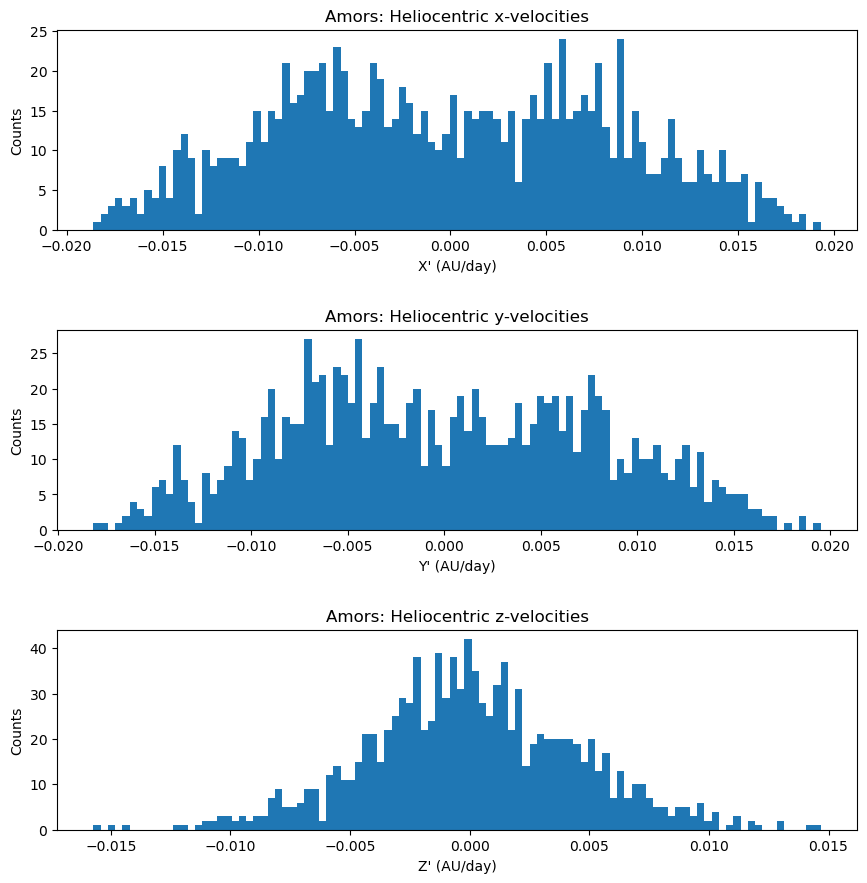

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.hist(amors["X'"], bins=100)
#plt.hist(main_belts['x_dotk'], bins=100)
ax1.set_title("Amors: Heliocentric x-velocities")
ax1.set_xlabel("X' (AU/day)")
ax1.set_ylabel("Counts")

ax2.hist(amors["Y'"], bins=100)
#plt.hist(-main_belts['y_dotk'], bins=100)
ax2.set_title("Amors: Heliocentric y-velocities")
ax2.set_xlabel("Y' (AU/day)")
ax2.set_ylabel("Counts")

ax3.hist(amors["Z'"], bins=100)
#plt.hist(main_belts['z_dotk'], bins=100)
ax3.set_title("Amors: Heliocentric z-velocities")
ax3.set_xlabel("Z' (AU/day)")
ax3.set_ylabel("Counts")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.4,hspace=0.5)

fig.set_figwidth(10)
fig.set_figheight(10)

plt.savefig('/home/ellie/research/lsst/amors_hist.png')
plt.show()

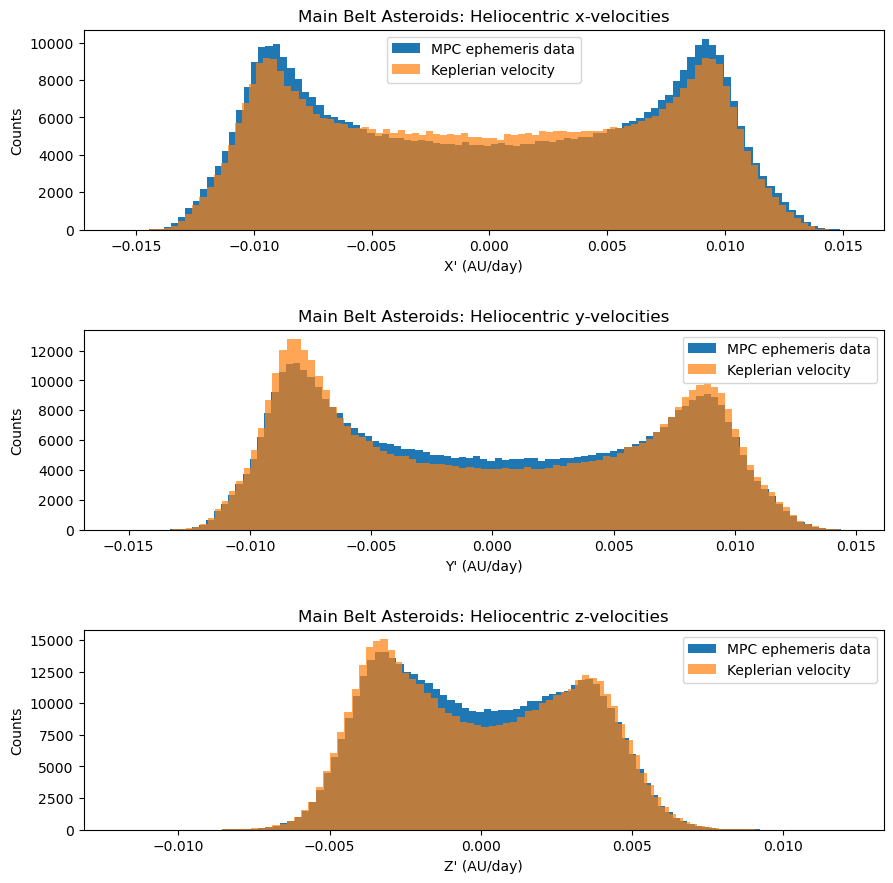

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.hist(main_belts["X'"], bins=100, label='MPC ephemeris data')
ax1.hist(main_belts['x_dotk'], bins=100, alpha=0.7, label='Keplerian velocity')
ax1.set_title("Main Belt Asteroids: Heliocentric x-velocities")
ax1.set_xlabel("X' (AU/day)")
ax1.set_ylabel("Counts")
ax1.legend()

ax2.hist(main_belts["Y'"], bins=100, label='MPC ephemeris data')
ax2.hist(main_belts['y_dotk'], bins=100, alpha=0.7, label='Keplerian velocity')
ax2.set_title("Main Belt Asteroids: Heliocentric y-velocities")
ax2.set_xlabel("Y' (AU/day)")
ax2.set_ylabel("Counts")
ax2.legend()

ax3.hist(main_belts["Z'"], bins=100, label='MPC ephemeris data')
ax3.hist(main_belts['z_dotk'], bins=100, alpha=0.7, label='Keplerian velocity')
ax3.set_title("Main Belt Asteroids: Heliocentric z-velocities")
ax3.set_xlabel("Z' (AU/day)")
ax3.set_ylabel("Counts")
ax3.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.4,hspace=0.5)

fig.set_figwidth(10)
fig.set_figheight(10)

#plt.tight_layout()
plt.savefig('/home/ellie/research/lsst/mba_hist.png')
plt.show()

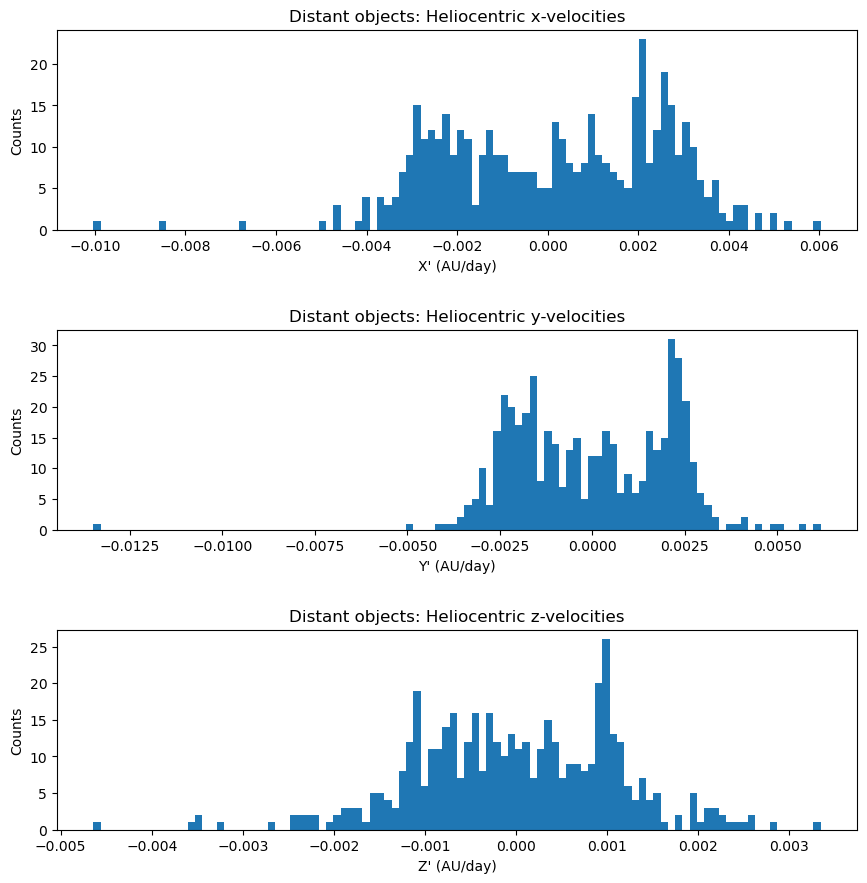

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.hist(distant["X'"], bins=100)
#plt.hist(main_belts['x_dotk'], bins=100)
ax1.set_title("Distant objects: Heliocentric x-velocities")
ax1.set_xlabel("X' (AU/day)")
ax1.set_ylabel("Counts")

ax2.hist(distant["Y'"], bins=100)
#plt.hist(main_belts['x_dotk'], bins=100)
ax2.set_title("Distant objects: Heliocentric y-velocities")
ax2.set_xlabel("Y' (AU/day)")
ax2.set_ylabel("Counts")

ax3.hist(distant["Z'"], bins=100)
#plt.hist(main_belts['x_dotk'], bins=100)
ax3.set_title("Distant objects: Heliocentric z-velocities")
ax3.set_xlabel("Z' (AU/day)")
ax3.set_ylabel("Counts")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.4,hspace=0.5)

fig.set_figwidth(10)
fig.set_figheight(10)

plt.savefig('/home/ellie/research/lsst/distant_hist.png')
plt.show()

In [8]:
## Identify velocity outliers
## first, bin the data by heliocentric distance

r = df['heliocentricDist']

## bin divisions:
r_min = min(r)
r_max = max(r)
nbins = 100
binwidth = (r_max - r_min)/nbins

bins = []

for i in range(nbins):
    bins.append(r_min+i*binwidth)

bins.append(r_min+nbins*binwidth)

print(r_max)
print(bins[-1])

95.56856460874997
95.56856460874997


In [23]:
## create a csv file containing the objects with the minimum and maximum velocities
## of objects in each bin. Note that empty bins are discarded, hence there may be 
## some "missing" bins in the resulting csv. 

min_vx_outliers = []
min_vx_id = []
max_vx_outliers = []
max_vx_id = []
min_types = []
max_types = []
bin_ranges = []
hdist_min = []
hdist_max = []

for j in range(nbins):

    if j == (nbins-1):
        filtered_df_r = df[(bins[j]<= df['heliocentricDist']) & (df['heliocentricDist'] <= bins[j+1])]
    else: 
        filtered_df_r = df[(bins[j]<= df['heliocentricDist']) & (df['heliocentricDist'] < bins[j+1])]

    if filtered_df_r.empty:
        continue
    
    idx_min_vx = filtered_df_r[filtered_df_r["X'"]==min(filtered_df_r["X'"])].index[0]
    idx_max_vx = filtered_df_r[filtered_df_r["X'"]== max(filtered_df_r["X'"])].index[0]

    #print(idx_min_vx)
    
    min_vx_outliers.append(min(filtered_df_r["X'"]))
    max_vx_outliers.append(max(filtered_df_r["X'"]))

    min_vx_id.append(filtered_df_r.loc[idx_min_vx, 'Principle_desig'])
    max_vx_id.append(filtered_df_r.loc[idx_max_vx, 'Principle_desig'])

    min_types.append(filtered_df_r.loc[idx_min_vx, 'Orbit_type'])
    max_types.append(filtered_df_r.loc[idx_max_vx, 'Orbit_type'])

    hdist_min.append(filtered_df_r.loc[idx_min_vx, 'heliocentricDist'])
    hdist_max.append(filtered_df_r.loc[idx_max_vx, 'heliocentricDist'])
    
    bin_ranges.append("{} to {}".format(bins[j], bins[j+1]))

df_outliers = pd.DataFrame()

df_outliers['Bin_range'] = bin_ranges
df_outliers['Max_VX_object'] = max_vx_id
df_outliers['Max_VX_object_type'] = max_types
df_outliers['Max_VX'] = max_vx_outliers
df_outliers['Min_VX_object'] = min_vx_id
df_outliers['Min_VX_object_type'] = min_types
df_outliers['Min_VX'] = min_vx_outliers

df_outliers.to_csv('/home/ellie/research/lsst/mpc_outliers_17july25.csv')    

df_topcat = pd.DataFrame()
df_topcat['Principle_desig'] = min_vx_id + max_vx_id
df_topcat['heliocentricDist'] = hdist_min + hdist_max
df_topcat["X'"] = min_vx_outliers + max_vx_outliers
df_topcat['outlier'] = ['y']*len(hdist_min+hdist_max)

df_topcat.to_csv('/home/ellie/research/lsst/mpc_outliers_17july25_topcat.csv')